
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you for submitting the project! I appreciate the time you took to update it!  I've left a couple of new comments with digit 2. Would you please take a look? 

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Cory! Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

   
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
   

    
- Used the correct way to encode columns;    
    
    
    
- Trained and compared several models, great!

    
- Analyzed metric and speed values;

    
    
- Wrote an excellent conclusion that shows how the project met its objectives. Good job! 

</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,



- Please try to explore the distributions and add conclusions. In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue; 

    
    
- Check the data for the duplicates after you drop irrelevant columns; 
    


- We also need to tune hyperparameters. We tune them to identify the hyperparameters that will yield the desired metric value. Would you try to implement it?  



      
- Please don't use the test subset until the final test for the reason I stated in one of my comments;



There may be other issues that need your attention. I described everything in my comments.  
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> great job here! You demonstrated strong analytical and modeling skills by preparing the data, experimenting with multiple advanced models, and evaluating them with appropriate metrics. The conclusion clearly communicates which model offers the best trade-off between speed and RMSE. There are just several issues that need your attention. Please take a look at my comments and do not hesitate to ask questions if some of them seem unclear. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a link to [Supervised Learning documenation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction that reflects the core goals. Well done!  
    
</div>

## Data preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import math
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostRegressor, Pool, metrics, cv
import xgboost as xgb
import time

In [2]:
df = pd.read_csv('/datasets/car_data.csv')
display(df.head())
display(df.info())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

In [3]:
missing_values = df.isnull().sum()
display(missing_values)

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [4]:
df.fillna('None', inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        354369 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            354369 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              354369 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           354369 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        354369 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment  </h2>
    
Makes sense! It's better than deleting them. Moreover, it is normal that sometimes sellers do not specify some information. The model should "know" about such cases. We even should not use median or mode. Even though the median does not skew the distribution, we have to many missing values to fill in because there is a risk of biasing the data.   
    
</div>

In [5]:
min_price = df['Price'].min()
max_price = df['Price'].max()
median_price = df['Price'].median()

print(f"Minimum Price: €{min_price}")
print(f"Maximum Price: €{max_price}")
print(f"Median Price: €{median_price}")

Minimum Price: €0
Maximum Price: €20000
Median Price: €2700.0


In [6]:
columns_to_drop = ["LastSeen", "DateCreated", "RegistrationYear", "RegistrationMonth", "PostalCode", "NumberOfPictures"]
df = df.drop(columns=columns_to_drop, errors="ignore")

# Step 2: Check and remove duplicates
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape

# Step 3: Report how many duplicates were removed
duplicates_removed = initial_shape[0] - final_shape[0]
print(f"Duplicates removed after dropping columns: {duplicates_removed}")
print(f"Remaining rows: {final_shape[0]}, Columns: {final_shape[1]}")

Duplicates removed after dropping columns: 538
Remaining rows: 353831, Columns: 10


In [7]:
display(df.describe())

,Price,Power,Mileage
count,353831.000000,353831.000000,353831.000000
mean,4415.400055,110.076890,128215.433357
std,4514.057788,189.981616,37905.632881
min,0.000000,0.000000,5000.000000
25%,1050.000000,69.000000,125000.000000
50%,2700.000000,105.000000,150000.000000
75%,6400.000000,143.000000,150000.000000
max,20000.000000,20000.000000,150000.000000


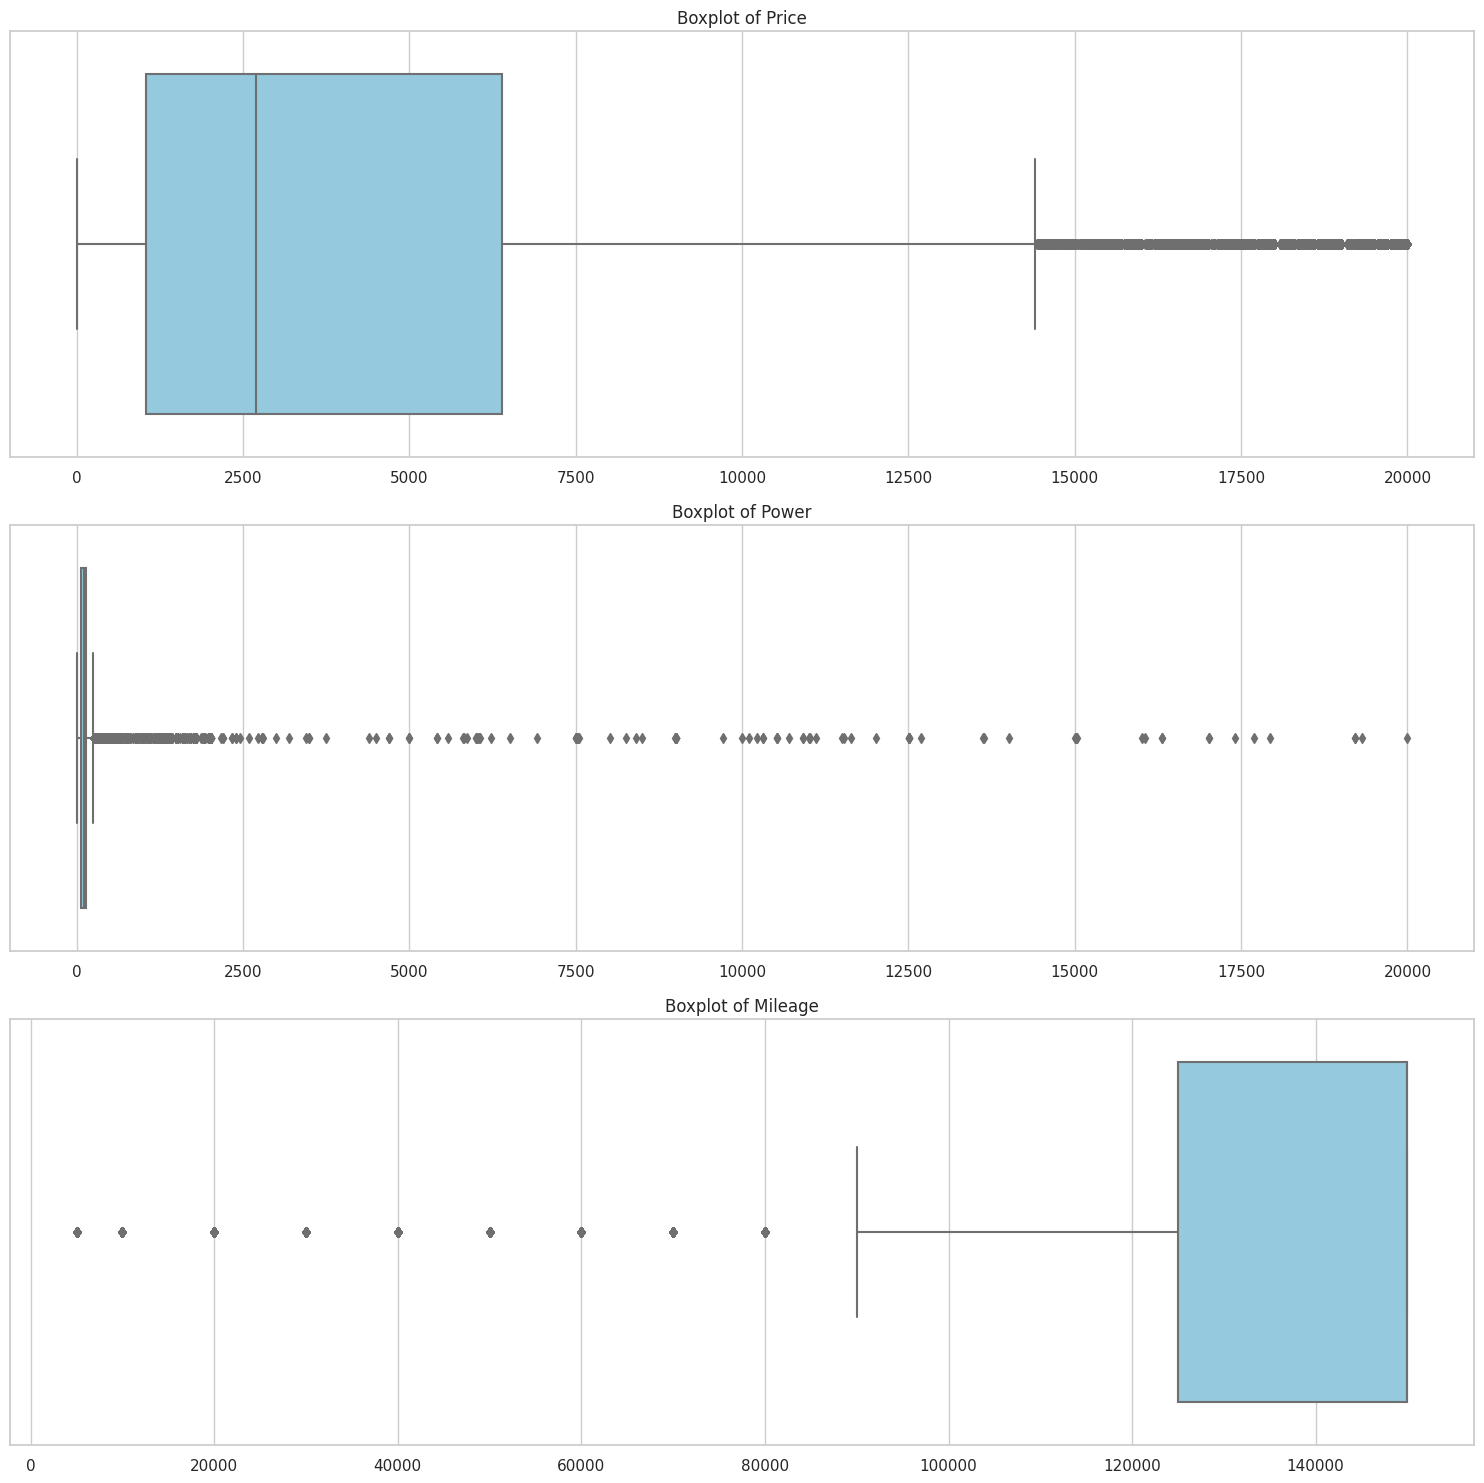

In [8]:
sns.set(style="whitegrid")

# Select numerical columns only
numerical_cols = df.select_dtypes(exclude=["object"]).columns

# Create subplots for each numerical feature
plt.figure(figsize=(15, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.xlabel("")

plt.tight_layout()
plt.show()

We have a lot of outliers in the data, lets cap the data being looked at in order to get a better look at the information thats needed.

In [9]:
lower_bound = df['Price'].quantile(0.05)
upper_bound = df['Price'].quantile(0.95)

df['Price'] = df['Price'].clip(lower=lower_bound, upper=upper_bound)
display(df.describe())

,Price,Power,Mileage
count,353831.000000,353831.000000,353831.000000
mean,4300.664563,110.076890,128215.433357
std,4166.758310,189.981616,37905.632881
min,200.000000,0.000000,5000.000000
25%,1050.000000,69.000000,125000.000000
50%,2700.000000,105.000000,150000.000000
75%,6400.000000,143.000000,150000.000000
max,14600.000000,20000.000000,150000.000000


Now that the neccesary cleaning is done, we can see our price ranges, Lets look at those training models

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Great job here! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
    
- IQR is often used to determine outliers in the normal distribution. Please keep in mind that not everything outside the boxplot whiskers is outlier. Likewise, not everything within whiskers is a normal data. This is because the whisker goes either to the maximum (minimum) or to 1.5 times the length of the box. The concentration of circles after the whiskers can be very high. Cutting off the whiskers, we can sometimes lose important information, as our sample can be really biased. So here you can drop values manually. 



- Minimum power value is still 0. 

</div>


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
- Consider comparing max dates in the `RegistrationYear` and  `DateCrawled` columns. Vehicle should not be registered after the data was downloaded :) 




- `DateCreated`, however, can be used to calculate the publication period. The longer an active advertisement remains published, the less likely the car is being sold, likely due to an overpriced offer.



- Consider analyzing categories as well. Petrol and gasoline refer to the same fuel, so we can use one of these categories. There are some other rare fuel types that can be dropped. If a category appears only in the training or validation subset, for instance, and we use `handle_unknown='ignore'`, the linear model might miss important signals in validation or make predictions with incomplete features thus breaking the assumptions of linearity. It may be helpful to make sure that training and validation subsets use the same feature columns after encoding. 
 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
- Isn't it strange that the minimum price is 0? Are there any outliers in the data?  Please call the `describe` method and display charts. Drop abnormal values if they exist. Hint: `price` and `power` columns definitely have outliers.




- There are columns that should be deleted to reduce computational cost. These are:  `LastSeen`, `DateCreated`, `RegistrationYear`, `RegistrationMonth`, `PostalCode` and `NumberOfPictures`. After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   


</div>


## Model training

In [10]:
X = df.drop(columns=["Price"])
y = df["Price"]

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Identify column types
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(exclude=["object"]).columns.tolist()

# Define transformers
numerical_transformer = SimpleImputer(strategy="median")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Create the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])
rf_model = RandomForestRegressor(
    n_estimators=200,           # number of trees in the forest
    max_depth=15,               # max depth of each tree
    min_samples_split=5,        # min samples to split an internal node
    min_samples_leaf=2,         # min samples required at a leaf node
    max_features='sqrt',        # number of features to consider at each split
    random_state=42,
    n_jobs=-1
)

# Create the pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", rf_model)
])

# Track training time
start_train = time.time()
model.fit(X_train, y_train)
end_train = time.time()

# Track prediction time
start_pred = time.time()
predictions = model.predict(X_valid)
end_pred = time.time()

# Evaluate the model
rmse = mean_squared_error(y_valid, predictions, squared=False)
print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Training time: {end_train - start_train:.2f} seconds")
print(f"Prediction time: {end_pred - start_pred:.4f} seconds")

Random Forest RMSE: 3704.29
Training time: 7.11 seconds
Prediction time: 0.3481 seconds


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Please do not use `X_test` and `y_test` in the cell above. In this section, we only train and/or tune models. We do not use test subset. This subset is saved for the final testing, which is conducted for the best model chosen among all models we trained. In other words, we first train and tune models using train and validation subsets, we do not use test subset, then we compare RMSE and choose the best model, it's one model. Only then we conduct the final testing with this one model using the test subset. So the test subset is used once in the whole project. 


</div>

<div class="alert alert-" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h4>   student's comment </h4>
    
   I was told to leave a comment by my cohorts tutor. As will show I created a validation split and used that through out. I was told to leave this note stating that using the X_test and y_test in the manner i did was even confusing to him (Anit) due to the fact that I was only using them for time stamp purposes. and to seek for further explenation if I needed to change anything after what I have already changed. Thanks

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Great choice! `OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    
    
    
Please note that `OrdinalEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c).


</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Please make sure you save at least one subset for the final testing. In the cell above, you split the data into 2 subsets. If one of the subsets must be saved for the final test and must not be touched, RMSE must be evaluated on the same subset you use for training. 
    



</div>

In [11]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)
predictions = model.predict(X_train)


# Track training time
start_train = time.time()
model.fit(X_train, y_train)
end_train = time.time()

# Track prediction time
start_pred = time.time()
predictions = model.predict(X_valid)
end_pred = time.time()

# Evaluate the model
rmse = mean_squared_error(y_valid, predictions, squared=False)
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Training time: {end_train - start_train:.4f} seconds")
print(f"Prediction time: {end_pred - start_pred:.4f} seconds")

Linear Regression RMSE: 3080.38
Training time: 0.9857 seconds
Prediction time: 0.1527 seconds


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Please do not use `X_test` and `y_test` in the cell above for the reason I mentioned above. Please make predictions and calculate metric on the training data. 


</div>


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Here and below, please use training or validation subset.     



</div>

Interesting, with the Random Forest we get a lower MSE then with the Linear Regressions, Its interesting to see that Random Forest took multiple minutes to train yet only thousandths of a second. Lets see if any of this changes when we use Gradient Boosting

In [12]:
def evaluate_model(regressor, name):
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", regressor)
    ])
    
    # Track training time
    start_train = time.time()
    pipeline.fit(X_train, y_train)
    end_train = time.time()

    # Track prediction time
    start_pred = time.time()
    predictions = pipeline.predict(X_valid)
    end_pred = time.time()

    # Calculate RMSE
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    
    # Print results
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} Training time: {end_train - start_train:.4f} seconds")
    print(f"{name} Prediction time: {end_pred - start_pred:.4f} seconds\n")

random_forest = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit RandomizedSearchCV
random_search.fit(preprocessor.fit_transform(X_train), y_train)

# Best model from RandomizedSearchCV
best_rf_random = random_search.best_estimator_

param_grid = {
    'n_estimators': [best_rf_random.n_estimators],
    'max_depth': [best_rf_random.max_depth],
    'min_samples_split': [best_rf_random.min_samples_split],
    'min_samples_leaf': [best_rf_random.min_samples_leaf],
    'max_features': [best_rf_random.max_features]
}

grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(preprocessor.fit_transform(X_train), y_train)

# Final tuned model
best_rf = grid_search.best_estimator_


# Evaluate best Random Forest from GridSearch
evaluate_model(best_rf, "Tuned Random Forest")

# Evaluate CatBoost
evaluate_model(
    CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_seed=42,
        verbose=0
    ),
    "CatBoost"
)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  13.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  13.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  13.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  21.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
You have successfully implemented hyperparameters tuning, well done!     
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Same issue. 

</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Nice results! Several models were compared here, very good! 

</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
- Please don't forget to use training subset instead of test subset in each of the cells above. 


    
- Please try to tune hyperparameters for at least one of the models. For this purpose, use `RandomizedSearchCV` and `GridSearchCV`. 


</div>

In [13]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_seed=42, verbose=0))
])

# Track training time
start_train = time.time()
model.fit(X_train, y_train)
end_train = time.time()

# Track prediction time
start_pred = time.time()
predictions = model.predict(X_test)
end_pred = time.time()

# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"CatBoost RMSE: {rmse:.2f}")
print(f"Training time: {end_train - start_train:.4f} seconds")
print(f"Prediction time: {end_pred - start_pred:.4f} seconds")

CatBoost RMSE: 2399.17
Training time: 14.4390 seconds
Prediction time: 0.1075 seconds



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct, we choose the best model (it's one model or two models if their errors are quite similar) and run the final test using the test subset to evaluate its generalization ability. 

</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
You can compare the results with a constant baseline. For instance, you can take [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html). 

</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
As you see, you get the same RMSE here. This is because for the final test, you use the same subset that you used to calculate RMSE in order to choose the best model, which is not fair :) Please use test subset only after you train and tune all models. We first train and tune all models, then we identify the best model (or two models if their metrics are similar), and then we run the final test using the test subset. The idea behind creating the test subset is to save this subset for the very final test, when the best model (or 2 models) is (are) chosen. 
    
    
This is important because in real-world tasks, we often evaluate our models on real-time data that could not have been known during the model's training process. By reserving the test set for a final evaluation, we simulate this situation. 
</div>

When running the Random Forest and Linear Regression, it was interesting to me that the Random Forest ran faster with a better MSE. When I boosted the Linear Regression we get a better MSE and a faster run time.

## Model analysis

while looking at the data, Random Forest Regression took multiple minutes to train. With Linear Regression it took roughly 2 seconds. After Boosting the training and prediction sets they time deops drastically! For Random Forest the training time dropped to just under half a minute. With Linear Regression we shave off a ten thousandths of a sec. Based on the analysis from the above data I recommend sticking with the Linear Regression Model to help Rusty meet his goals.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
Great conclusion! This is a solid final summary with comparison across models. It's also important that you compared models not only by their prediction error but also training speed, which is relevant for the business use case.
</div>    

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed